In [1]:
import pandas as pd

In [2]:
import numpy as np

In [24]:
data=pd.read_csv("data.csv",header=None)
data.columns =list("abcde")

In [25]:
y=pd.get_dummies(data["e"],prefix="e").as_matrix()

In [26]:
x=data.drop(["e"],axis=1).as_matrix()

In [28]:
y.shape

(1372, 2)

In [29]:
data.describe()

,a,b,c,d,e
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np

Using TensorFlow backend.
/home/fafun/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [61]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(10, activation='sigmoid', input_dim=4))
model.add(Dense(10, activation='sigmoid'))

model.add(Dropout(rate=0.25))
model.add(Dense(2,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])

history=model.fit(X_train,y_train, epochs=100, batch_size=10)



score = model.evaluate( X_test,y_test, batch_size=10)

Epoch 1/100
1166/1166 [==============================] - 0s 398us/step - loss: 0.7698 - acc: 0.4794
Epoch 2/100
1166/1166 [==============================] - 0s 113us/step - loss: 0.7051 - acc: 0.5437
Epoch 3/100
1166/1166 [==============================] - 0s 122us/step - loss: 0.6498 - acc: 0.6081
Epoch 4/100
1166/1166 [==============================] - 0s 121us/step - loss: 0.6065 - acc: 0.6835
Epoch 5/100
1166/1166 [==============================] - 0s 120us/step - loss: 0.5810 - acc: 0.7256
Epoch 6/100
1166/1166 [==============================] - 0s 118us/step - loss: 0.5452 - acc: 0.7642
Epoch 7/100
1166/1166 [==============================] - 0s 123us/step - loss: 0.5165 - acc: 0.7899
Epoch 8/100
1166/1166 [==============================] - 0s 116us/step - loss: 0.4639 - acc: 0.8353
Epoch 9/100
1166/1166 [==============================] - 0s 120us/step - loss: 0.4200 - acc: 0.8756
Epoch 10/100
1166/1166 [==============================] - 0s 124us/step - loss: 0.3816 - acc: 0.8834

1166/1166 [==============================] - 0s 151us/step - loss: 0.0325 - acc: 0.9897
Epoch 83/100
1166/1166 [==============================] - 0s 142us/step - loss: 0.0257 - acc: 0.9923
Epoch 84/100
1166/1166 [==============================] - 0s 203us/step - loss: 0.0271 - acc: 0.9923
Epoch 85/100
1166/1166 [==============================] - 0s 162us/step - loss: 0.0319 - acc: 0.9880
Epoch 86/100
1166/1166 [==============================] - 0s 127us/step - loss: 0.0357 - acc: 0.9880
Epoch 87/100
1166/1166 [==============================] - 0s 214us/step - loss: 0.0289 - acc: 0.9914
Epoch 88/100
1166/1166 [==============================] - 0s 193us/step - loss: 0.0319 - acc: 0.9863
Epoch 89/100
1166/1166 [==============================] - 0s 118us/step - loss: 0.0261 - acc: 0.9914
Epoch 90/100
1166/1166 [==============================] - 0s 182us/step - loss: 0.0300 - acc: 0.9880
Epoch 91/100
1166/1166 [==============================] - 0s 190us/step - loss: 0.0251 - acc: 0.9931
Epo

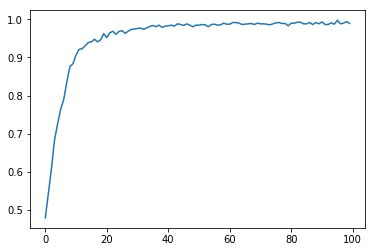

In [62]:
import matplotlib.pyplot as plt
plt.plot(history.history["acc"])
plt.show()

In [64]:
print(score)

[0.014370368475442553, 0.99514562991058941]
